In [191]:
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from typing import List, Tuple, Union
from dataclasses import dataclass
from scipy.spatial import distance
from scipy.linalg import block_diag


## 関数

ユークリッド距離  
np.linalog.norm(p - q)

In [192]:
def calculate_distance(x1, y1, x2, y2, z1, z2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return distance

## 3次元分布推定のテスト

### 環境設定

10 * 20 * 10 の部屋

In [193]:
x = 10
y = 20
z = 10

In [194]:
## 線源 2個 [x,y,z,I]

source_list = []
source_1 = [5.4, 7.3, 0.0, 100]
source_2 = [10, 8.2, 4.7, 200]
source_list.append(source_1)
source_list.append(source_2)
print(source_list)

[[5.4, 7.3, 0.0, 100], [10, 8.2, 4.7, 200]]


In [195]:
attenuation = 0.10177304964539008

In [196]:
# グリッド 幅で指定
g = 1
q_max = 200
q_init = 1/q_max
q1 = np.array([q_init] * (x * y)).reshape(x * y, 1)  # 地面 z=0
q2 = np.array([q_init] * (y * z)).reshape(y * z, 1)  # 側面1 x=0
q3 = np.array([q_init] * (x * z)).reshape(x * z, 1)  # 側面2 y=0
q4 = np.array([q_init] * (y * z)).reshape(y * z, 1)  # 側面3 x=10
q5 = np.array([q_init] * (x * z)).reshape(x * z, 1)  # 側面4 y=20
q6 = np.array([q_init] * (x * y)).reshape(x * y, 1)  # 天井 z=10

In [197]:
# 各 qn の長さを確認
print(f"q1: {q1.shape}")
print(f"q2: {q2.shape}")
print(f"q3: {q3.shape}")
print(f"q4: {q4.shape}")
print(f"q5: {q5.shape}")
print(f"q6: {q6.shape}")

q1: (200, 1)
q2: (200, 1)
q3: (100, 1)
q4: (200, 1)
q5: (100, 1)
q6: (200, 1)


### 測定位置の決定

In [198]:
def decide_measurement_points(x,y,r):
    m_p = []
    #z軸は固定
    m_p_c = []
    for i in range(x):
        for j in range(y):
            m_p_c.append([0.5+i,0.5+j,0.5])
    
    num_points = int(r * len(m_p_c))
    m_p = random.sample(m_p_c, num_points)
    return m_p

def add_shield(m_p):
    m_p_s = [] #shield位置情報アリ
    for i in range(len(m_p)):
        m_p_A = m_p[i].copy()
        m_p_A.append('A')
        m_p_s.append(m_p_A)
        m_p_B = m_p[i].copy()
        m_p_B.append('B')
        m_p_s.append(m_p_B)
        m_p_C = m_p[i].copy()
        m_p_C.append('C')
        m_p_s.append(m_p_C)
        m_p_D = m_p[i].copy()
        m_p_D.append('D')
        m_p_s.append(m_p_D)
    
    return m_p_s

In [199]:
r = 0.7
m_p = decide_measurement_points(x,y,r)
m_p_s = add_shield(m_p)
print(m_p_s)

[[8.5, 11.5, 0.5, 'A'], [8.5, 11.5, 0.5, 'B'], [8.5, 11.5, 0.5, 'C'], [8.5, 11.5, 0.5, 'D'], [7.5, 12.5, 0.5, 'A'], [7.5, 12.5, 0.5, 'B'], [7.5, 12.5, 0.5, 'C'], [7.5, 12.5, 0.5, 'D'], [0.5, 6.5, 0.5, 'A'], [0.5, 6.5, 0.5, 'B'], [0.5, 6.5, 0.5, 'C'], [0.5, 6.5, 0.5, 'D'], [0.5, 5.5, 0.5, 'A'], [0.5, 5.5, 0.5, 'B'], [0.5, 5.5, 0.5, 'C'], [0.5, 5.5, 0.5, 'D'], [1.5, 8.5, 0.5, 'A'], [1.5, 8.5, 0.5, 'B'], [1.5, 8.5, 0.5, 'C'], [1.5, 8.5, 0.5, 'D'], [1.5, 3.5, 0.5, 'A'], [1.5, 3.5, 0.5, 'B'], [1.5, 3.5, 0.5, 'C'], [1.5, 3.5, 0.5, 'D'], [2.5, 17.5, 0.5, 'A'], [2.5, 17.5, 0.5, 'B'], [2.5, 17.5, 0.5, 'C'], [2.5, 17.5, 0.5, 'D'], [5.5, 10.5, 0.5, 'A'], [5.5, 10.5, 0.5, 'B'], [5.5, 10.5, 0.5, 'C'], [5.5, 10.5, 0.5, 'D'], [0.5, 3.5, 0.5, 'A'], [0.5, 3.5, 0.5, 'B'], [0.5, 3.5, 0.5, 'C'], [0.5, 3.5, 0.5, 'D'], [6.5, 13.5, 0.5, 'A'], [6.5, 13.5, 0.5, 'B'], [6.5, 13.5, 0.5, 'C'], [6.5, 13.5, 0.5, 'D'], [9.5, 15.5, 0.5, 'A'], [9.5, 15.5, 0.5, 'B'], [9.5, 15.5, 0.5, 'C'], [9.5, 15.5, 0.5, 'D'], [7.5, 8

In [296]:
# 測定ポイントのプロット
def plot_measurement_points(m_points, sources, title):
    plt.figure(figsize=(10, 20))
    x_ns, y_ns = zip(*[(p[0], p[1]) for p in m_points])
    plt.scatter(x_ns, y_ns, color='blue', label='Measurement points')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.xlim(0, x)
    plt.ylim(0, y)
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.show()

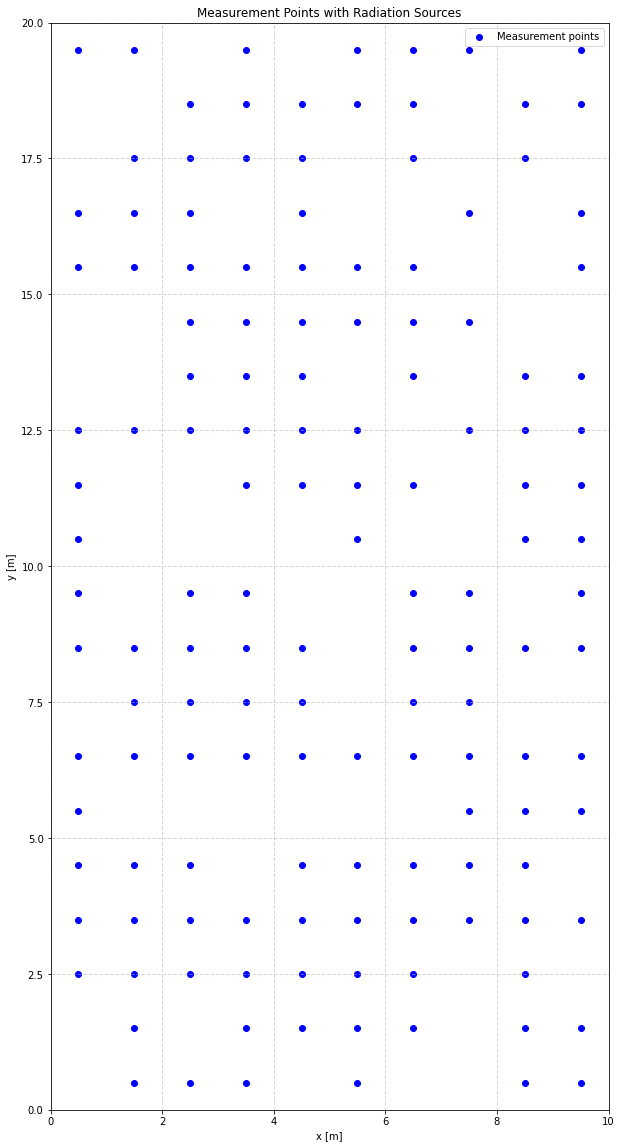

In [297]:

plot_measurement_points(m_p, [source_1[:2], source_2[1:3]], 'Measurement Points with Radiation Sources')


### 計測

In [200]:
def measurement_shield(m_p_s, source_list):
    rad = []
    for i in range(len(m_p_s)):
        temp_rad = 0
        s_pos = m_p_s[i][3]
        for l in source_list:
            dis = calculate_distance(m_p_s[i][0],m_p_s[i][1],m_p_s[i][2],l[0],l[1],l[2])
            if s_pos == 'A':
                if m_p_s[i][0] < l[0] and m_p_s[i][1] < l[1]:
                    temp_rad += l[3] / (dis**2) * attenuation
                else:
                    temp_rad += l[3] / (dis**2)
            elif s_pos == 'B':
                if m_p_s[i][0] < l[0] and m_p_s[i][1] > l[1]:
                    temp_rad += l[3] / (dis**2) * attenuation
                else:
                    temp_rad += l[3] / (dis**2)
            elif s_pos == 'C':
                if m_p_s[i][0] > l[0] and m_p_s[i][1] > l[1]:
                    temp_rad += l[3] / (dis**2) * attenuation
                else:
                    temp_rad += l[3] / (dis**2)
            elif s_pos == 'D':
                if m_p_s[i][0] > l[0] and m_p_s[3][1] < l[1]:
                    temp_rad += l[2] / (dis**2) * attenuation
                else:
                    temp_rad += l[3] / (dis**2)

        rad.append(temp_rad)
    return rad

In [201]:
b_m = measurement_shield(m_p_s, source_list)
print(b_m)

[3.195019891575454, 0.9065435849395052, 2.6136432246792665, 3.195019891575454, 3.6178418103761913, 0.9564286241403103, 3.029611980412465, 3.6178418103761913, 1.0175399459022338, 9.998127691443552, 9.998127691443552, 9.998127691443552, 0.8172394980905621, 8.03001876172608, 8.03001876172608, 8.03001876172608, 14.468171033368677, 1.4724698888570251, 14.468171033368677, 14.468171033368677, 0.5425235620362949, 5.330719320356626, 5.330719320356626, 5.330719320356626, 3.2495387063463843, 0.33071546408560726, 3.2495387063463843, 3.2495387063463843, 6.292106104186644, 1.501562368962055, 5.4309105621400375, 6.292106104186644, 0.5523420859166782, 5.427194014930427, 5.427194014930427, 5.427194014930427, 3.9513629160908934, 0.9820176256624304, 3.3714875446547348, 3.9513629160908934, 2.042624057458011, 0.5880055143736223, 1.6625026226909305, 2.042624057458011, 4.043261348363626, 1.2142000874042247, 3.2405562988956995, 4.043261348363626, 0.7678728155169873, 7.544952403337644, 7.544952403337644, 7.544

### A

In [202]:
def create_grid(x,y,z):
    G = []
    if x == 0 and y != 0 and z != 0:
        for i in range(y*z):
            G_y = (i%y)*g + g/2 
            G_z = (i//y)*g + g/2
            G.append([0,G_y,G_z])
    elif x == 10 and y != 0 and z != 0:
        for i in range(y*z):
            G_y = (i%y)*g + g/2 
            G_z = (i//y)*g + g/2
            G.append([10,G_y,G_z])
    elif y == 0 and x != 0 and z != 0:
        for i in range(x*z):
            G_x = (i%x)*g + g/2 
            G_z = (i//x)*g + g/2
            G.append([G_x,0,G_z])
    elif y == 20 and x!= 0 and z != 0:
        for i in range(x*z):
            G_x = (i%x)*g + g/2 
            G_z = (i//x)*g + g/2
            G.append([G_x,20,G_z])
    elif z == 0 and x != 0 and y != 0:
        for i in range(x*y):
            G_x = (i%x)*g + g/2 
            G_y = (i//x)*g + g/2
            G.append([G_x,G_y,0])
    elif z == 10 and x != 0 and y != 0:
        for i in range(x*y):
            G_x = (i%x)*g + g/2 
            G_y = (i//x)*g + g/2
            G.append([G_x,G_y,10])

    return G
    

In [203]:
G1 = create_grid(x,y,0) #地面 z=0
G2 = create_grid(0,y,z) #側面1 x=0
G3 = create_grid(x,0,z) #側面2 y=0
G4 = create_grid(10,y,z) #側面3 x=10
G5 = create_grid(x,20,z) #側面4 y=20
G6 = create_grid(x,y,10) #天井 z=10

In [204]:
# A
def create_A(l1,l2,m_p,G):
    d1 = l1/g #グリッドの個数
    d2 = l2/g
    n_m = len(m_p)
    A = np.zeros((n_m,int(d1*d2)))
    for i in range(n_m):
        m_x = m_p[i][0]
        m_y = m_p[i][1]
        m_z = m_p[i][2]
        s_pos = m_p[i][3]
        for j in range(int(d1*d2)):
            G_x = G[j][0]
            G_y = G[j][1]
            G_z = G[j][2]
            dis = calculate_distance(m_x,m_y,m_z,G_x,G_y,G_z)
            A[i][j] = 1/(dis**2)

            if s_pos == 'A':
                if m_x < G_x and m_y < G_y:
                    A[i][j] *= attenuation
            elif s_pos == 'B':
                if m_x < G_x and m_y > G_y:
                    A[i][j] *= attenuation
            elif s_pos == 'C':
                if m_x > G_x and m_y > G_y:
                    A[i][j] *= attenuation
            elif s_pos == 'D':
                if m_x > G_x and m_y < G_y:
                    A[i][j] *= attenuation

    return A

In [205]:
A1 = create_A(x,y,m_p_s,G1) #地面 z=0
A2 = create_A(y,z,m_p_s,G2) #側面1 x=0
A3 = create_A(x,z,m_p_s,G3) #側面2 y=0
A4 = create_A(y,z,m_p_s,G4) #側面3 x=10
A5 = create_A(x,z,m_p_s,G5) #側面4 y=20
A6 = create_A(x,y,m_p_s,G6) #天井 z=10

In [228]:
A = np.hstack((A1, A2, A3, A4, A5, A6))
print(f"A: {A.shape}")



A: (560, 1000)


In [246]:
q = np.vstack((q1, q2, q3, q4, q5, q6))
print(f"q: {q.shape}")
b = np.dot(A,q)
print(len(b))

q: (1000, 1)


TypeError: 'tuple' object is not callable

### MLE

### 最適化

In [260]:
def score_func(A, b, q):
    b_ave = A.dot(q)
    score = np.sum(b * np.log(b_ave)) - np.sum(b_ave)
    return score

# gradient function

def grad_func(A, b, q):
    b_ave = A.dot(q)
    grad_tmp = (b.flatten() / b_ave.flatten())[:, np.newaxis] * A
    grad = grad_tmp.sum(axis=0) - A.sum(axis=0)
    return grad.reshape(q.shape)


In [261]:
def Adam(A, b, q, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    m = np.zeros_like(q)
    v = np.zeros_like(q)
    
    for i in range(max_iter):
        t = i + 1
        gradient = grad_func(A, b, q)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        q += learning_rate * m_hat / (np.sqrt(v_hat + epsilon))

        # bound > 0
        q[q<0]=0.0000001
        score = score_func(A,b,q)
    
    return q

In [262]:
b_m_s = np.array(b_m)

In [263]:
init_score = score_func(A,b_m_s,q)
print(f'initial score{init_score}')

initial score-3798744.2510169568


In [267]:
q_optimized = Adam(A, b_m_s, q, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=200000)

In [268]:
def restore_q(q_optimized, q_shapes):
    restored_q = []
    index = 0
    for shape in q_shapes:
        length = shape[0]
        restored_q.append(q_optimized[index:index + length].reshape(shape))
        index += length
    return restored_q

In [270]:
q_shapes = [(x * y, 1), (y * z, 1), (x * z, 1), (y * z, 1), (x * z, 1), (x * y, 1)]
restored_qs = restore_q(q_optimized, q_shapes)
# 結果の表示

q1の形状: (200, 1)
[[1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [3.65423648e-03]
 [3.10549968e-03]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000e-07]
 [1.00000000

In [289]:
# ヒートマップのプロット
def plot_heatmap(q, shape, extent, title, sources=None):
    q_grid = q.reshape(shape)
    plt.figure()
    plt.imshow(q_grid, origin='lower', cmap='Greys', extent=extent)
    plt.colorbar(label='[Sv/h]')
    plt.title(title)
    
    if sources:
        for source in sources:
            plt.scatter(source[0], source[1], color='red')
    
    plt.show()

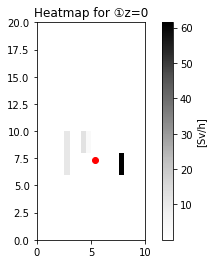

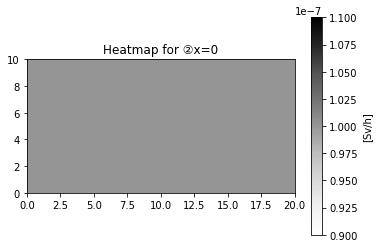

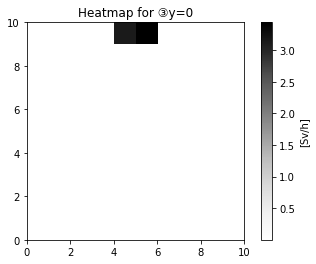

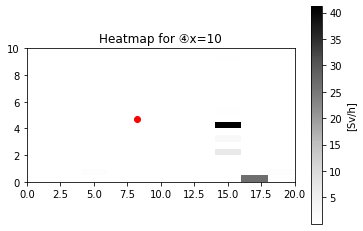

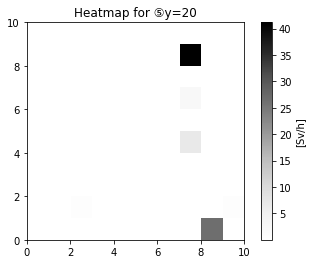

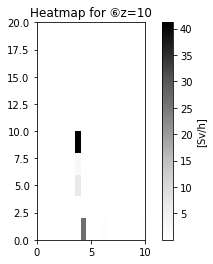

In [290]:
# ヒートマップの表示
plot_heatmap(restored_qs[0], (x, y), [0, x, 0, y], 'Heatmap for ①z=0', [source_1[:2]]) #地面 z=0
plot_heatmap(restored_qs[1], (y, z), [0, y, 0, z], 'Heatmap for ②x=0') #側面1 x=0
plot_heatmap(restored_qs[2], (x, z), [0, x, 0, z], 'Heatmap for ③y=0') #側面2 y=0
plot_heatmap(restored_qs[3], (y, z), [0, y, 0, z], 'Heatmap for ④x=10', [source_2[1:3]]) #側面3 x=10
plot_heatmap(restored_qs[4], (x, z), [0, x, 0, z], 'Heatmap for ⑤y=20') #側面4 y=20
plot_heatmap(restored_qs[5], (x, y), [0, x, 0, y], 'Heatmap for ⑥z=10') #天井 z=10

## Minamoto